### PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r'parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
# --- Data Preparation ---
# Drop the 'name' column as it is an identifier and 'status' is the target
features = df.drop(['name', 'status'], axis=1)
target = df['status']

In [4]:
# --- Scaling ---
# Standardize the features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [5]:
# --- PCA with 2 components ---
pca2 = PCA(n_components=2)
principal_components_2 = pca2.fit_transform(X_scaled)

C:\Users\arpit\AppData\Local\Temp\ipykernel_10276\3025493488.py:8: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(*scatter.legend_elements(), labels=[str(x) for x in sorted(target.unique())])


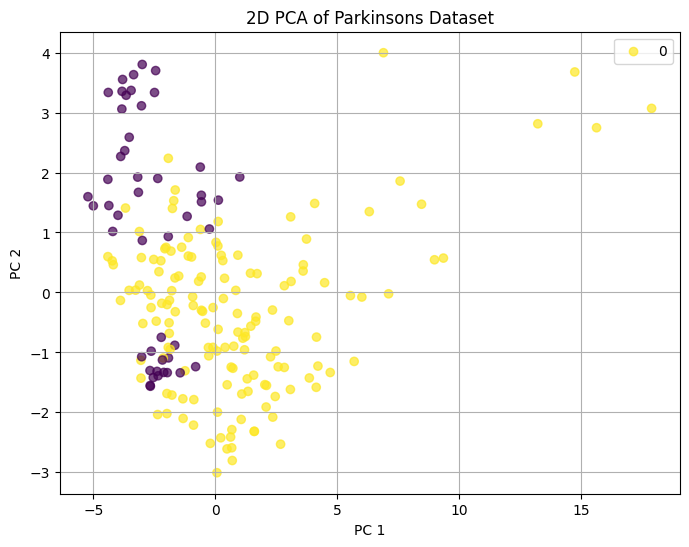

In [6]:
# --- 2D Visualization with Matplotlib ---
plt.figure(figsize=(8,6))
scatter = plt.scatter(principal_components_2[:,0], principal_components_2[:,1], 
                      c=target, cmap='viridis', alpha=0.7)
plt.title('2D PCA of Parkinsons Dataset')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(*scatter.legend_elements(), labels=[str(x) for x in sorted(target.unique())])
plt.grid(True)
plt.show()

In [7]:
# --- PCA with 3 components ---
pca3 = PCA(n_components=3)
principal_components_3 = pca3.fit_transform(X_scaled)

C:\Users\arpit\AppData\Local\Temp\ipykernel_10276\2147881676.py:22: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  ax.legend(*scatter.legend_elements(), labels=unique_labels)


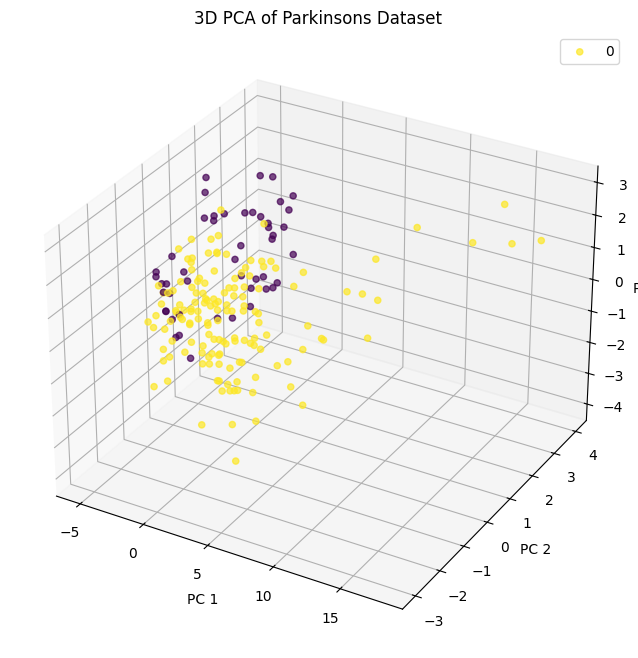

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

# 3D scatter plot
scatter = ax.scatter(
    principal_components_3[:, 0],
    principal_components_3[:, 1],
    principal_components_3[:, 2],
    c=target,
    cmap='viridis',
    alpha=0.7
)

# Labels and title
ax.set(title='3D PCA of Parkinsons Dataset',
       xlabel='PC 1',
       ylabel='PC 2',
       zlabel='PC 3')

# Create legend
unique_labels = np.unique(target)
ax.legend(*scatter.legend_elements(), labels=unique_labels)

plt.show()